In [2]:
import math
from top2vec import Top2Vec
import numpy as np
import pandas as pd
import umap
from csv import writer
#import umap.plot
import matplotlib.pyplot as plt


/Users/charlottepanuskova/anaconda3/lib/python3.11/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/Users/charlottepanuskova/anaconda3/lib/python3.11/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/Users/charlottepanuskova/anaconda3/lib/python3.11/site-packages/uma

### LOAD FILES

In [19]:


#file = 'top2vec_umap_n_n15_hdbscan_m_c_s15_doc2vec_new' #_NOV_COL_MEM_VER
file = 'top2vec_original_setting_new_NOV_COL_VER'
fiction = True
folder = 'whole books  NOV COL MEM VER' if fiction else 'whole books'
file_ending = "_NOV_COL_VER" if fiction else ''

#df_path = 'data/books info/whole books/books_info_jerome_synv9_id_all_categories_without_residual.xlsx' #
#df_path = 'data/results/BERTopic/whole books/bert_umap_n_n5_paraphrase-multilingual-MiniLM-L12-v2.xlsx'#distiluse-base-multilingual-cased-v2
df_path = 'data/results/top2vec/{folder}/{file}.xlsx'.format(folder = folder, file = file) #  NOV COL MEM VER
model_path = 'models/{folder}/top2vec/{file}'.format(folder = folder, file = file) #  NOV COL MEM VER
df = pd.read_excel(df_path)

In [50]:
df.head()

,Unnamed: 0,title,author,publisher,first_published,authsex,translator,srclang,txtype,audience,topic,score
0,0,Planeta lykantů,"Garen, Jean-Pierre",Najáda,1992,M: muž,"Procházková, Eva",fr: francouzština,NOV: próza,"GEN: obecné publikum"">",0,0.331159
1,1,Fiesta,"Hemingway, Ernest",Svoboda,1966,M: muž,"Vrba, František",en: angličtina,NOV: próza,"GEN: obecné publikum"">",0,0.384781
2,2,Příběh inženýra lidských duší,"Škvorecký, Josef",Atlantis,1977,M: muž,X,cs: čeština,NOV: próza,"GEN: obecné publikum"">",1,0.325519
3,3,Píseň o lítosti,"Fischl, Viktor",Atlantis,1982,M: muž,X,cs: čeština,NOV: próza,"GEN: obecné publikum"">",1,0.387661
4,4,Matka Noc,"Vonnegut, Kurt",Volvox Globator,1992,M: muž,"Ryba, Zbyněk",en: angličtina,NOV: próza,"GEN: obecné publikum"">",0,0.353534


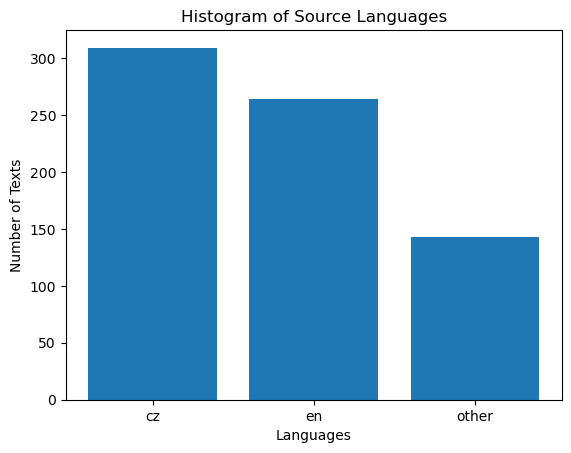

In [4]:
# data = {'srclang': ['cz', 'en', 'other'], 'values': [309, 264, 143]}
# df_hist = pd.DataFrame(data)

# plt.bar(df_hist['srclang'], df_hist['values'])
# plt.xlabel('Languages')
# plt.ylabel('Number of Texts')
# plt.title('Histogram of Source Languages')
# plt.show()

In [5]:
df.srclang.value_counts()

srclang
cs: čeština          310
en: angličtina       264
fr: francouzština     39
de: němčina           36
es: španělština       11
ru: ruština           11
pl: polština           6
it: italština          6
sv: švédština          4
da: dánština           4
ja: japonština         4
pt: portugalština      3
nl: nizozemština       3
M: více jazyků         3
sk: slovenština        2
he: hebrejština        2
no: norština           2
fi: finština           2
sr: srbština           1
hu: maďarština         1
is: islandština        1
el: řečtina            1
ar: arabština          1
Name: count, dtype: int64

### CREATE HEATMAP - CZECH, ENGLISH AND TRANSLATIONS - NUMBER OF BOOKS PER TOPIC

In [6]:
languages = df.srclang.unique()
topics = np.unique(df.topic.unique())   
heat_mat_1 = np.zeros(shape=(len(topics), 3))
for i, topic in enumerate(topics):
    for j, language in enumerate(languages):
        print(str(topic) + ' ' + str(language) )
        print(len(df[(df.topic == topic) & (df.srclang == language)].index)   )
        if language in ['cs: čeština']: #, 'en: angličtina'
            heat_mat_1[i][0] = len(df[(df.topic == topic) & (df.srclang == language)].index) 
        elif language in ['en: angličtina']: #, 
            heat_mat_1[i][1] = len(df[(df.topic == topic) & (df.srclang == language)].index)   
        else:
            heat_mat_1[i][2] += len(df[(df.topic == topic) & (df.srclang == language)].index)     
    heat_mat_1[i][0] = heat_mat_1[i][0] /  len(df[(df.topic == topic)])  
    heat_mat_1[i][1] = heat_mat_1[i][1] /  len(df[(df.topic == topic)])
    heat_mat_1[i][2] = heat_mat_1[i][2] /  len(df[(df.topic == topic)])
            

0 fr: francouzština
0
0 en: angličtina
2
0 cs: čeština
218
0 ru: ruština
5
0 it: italština
0
0 de: němčina
6
0 pt: portugalština
0
0 sv: švédština
0
0 da: dánština
0
0 pl: polština
2
0 es: španělština
0
0 hu: maďarština
0
0 he: hebrejština
0
0 nl: nizozemština
0
0 ja: japonština
0
0 no: norština
1
0 M: více jazyků
1
0 fi: finština
0
0 el: řečtina
1
0 is: islandština
0
0 sk: slovenština
0
0 sr: srbština
0
0 ar: arabština
0
1 fr: francouzština
4
1 en: angličtina
139
1 cs: čeština
18
1 ru: ruština
1
1 it: italština
0
1 de: němčina
3
1 pt: portugalština
0
1 sv: švédština
1
1 da: dánština
1
1 pl: polština
0
1 es: španělština
0
1 hu: maďarština
0
1 he: hebrejština
0
1 nl: nizozemština
0
1 ja: japonština
2
1 no: norština
1
1 M: více jazyků
0
1 fi: finština
1
1 el: řečtina
0
1 is: islandština
0
1 sk: slovenština
1
1 sr: srbština
1
1 ar: arabština
0
2 fr: francouzština
6
2 en: angličtina
43
2 cs: čeština
52
2 ru: ruština
2
2 it: italština
0
2 de: němčina
9
2 pt: portugalština
0
2 sv: švédština


#### PLOT HEATMAP

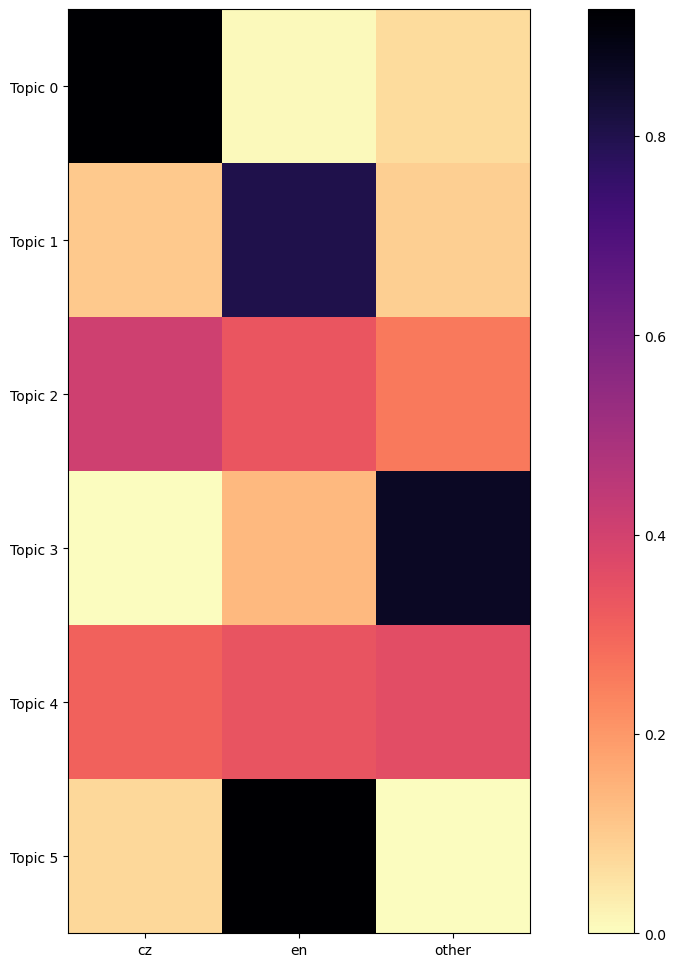

In [8]:
plt.figure(figsize=(15, 12))


fig = plt.imshow(heat_mat_1, cmap='magma_r', interpolation='nearest')
plt.xticks(range(3), ['cz','en', 'other'])
num_topics = len(df.topic.unique())
y_ticks = ['Topic ' + str(n) for n in range(num_topics)]
plt.yticks(range(num_topics), y_ticks)
plt.colorbar(fig)
plt.show()

### CREATE HEATMAP - CZECH, ENGLISH AND TRANSLATIONS - SCORE OF BOOKS PER TOPIC

In [243]:
languages = df.srclang.unique()
topics = df.topic.unique()    
heat_mat_2 = np.zeros(shape=(len(topics), 3))
for i, topic in enumerate(topics):
    for j, language in enumerate(languages):
        if language in ['cs: čeština']: 
            heat_mat_2[i][0] = sum(df[(df.topic == topic) & (df.srclang == language)].score)   
        elif language in ['en: angličtina']:
            heat_mat_2[i][1] = sum(df[(df.topic == topic) & (df.srclang == language)].score)      
        else:
            heat_mat_2[i][2] += sum(df[(df.topic == topic) & (df.srclang == language)].score)      

#### PLOT HEATMAP

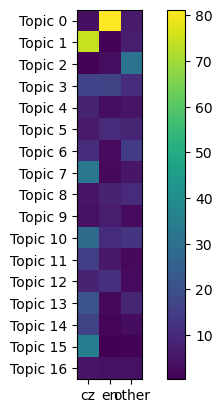

In [244]:
fig = plt.imshow(heat_mat_2, cmap='viridis', interpolation='nearest')
plt.xticks(range(3), ['cz','en', 'other'])
y_ticks = ['Topic ' + str(n) for n in range(num_topics)]
plt.yticks(range(num_topics), y_ticks)
plt.colorbar(fig)
plt.show()

### CREATE HEATMAP - CZECH AND TRANSLATIONS - SCORE OF BOOKS PER TOPIC

In [245]:
languages = df.srclang.unique()
topics = df.topic.unique()    
heat_mat_3 = np.zeros(shape=(len(topics), 2))
for i, topic in enumerate(topics):
    for j, language in enumerate(languages):
        if language in ['cs: čeština']: 
            heat_mat_3[i][1] = sum(df[(df.topic == topic) & (df.srclang == language)].score)   
        else:
            heat_mat_3[i][0] += sum(df[(df.topic == topic) & (df.srclang == language)].score)    
    heat_mat_3[i][1] = heat_mat_3[i][1] /  sum(df[(df.topic == topic)].score)
    heat_mat_3[i][0] = heat_mat_3[i][0] /  sum(df[(df.topic == topic)].score)       

#### PLOT HEATMAP

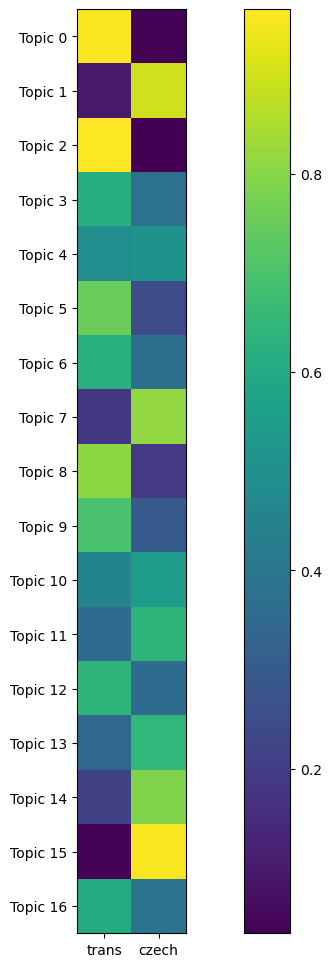

In [249]:
plt.figure(figsize=(15, 12))

fig = plt.imshow(heat_mat_3, cmap='viridis', interpolation='nearest')
plt.xticks(range(2), ['trans', 'czech'])
y_ticks = ['Topic ' + str(n) for n in range(num_topics)]
plt.yticks(range(num_topics), y_ticks)
plt.colorbar(fig)

plt.show()

### CREATE HEATMAP - CZECH AND TRANSLATIONS - NUMBER OF BOOKS PER TOPIC

In [9]:
languages = df.srclang.unique()
topics = np.unique(df.topic.unique()) 
heat_mat_4 = np.zeros(shape=(len(topics), 2))
for i, topic in enumerate(topics):
    for j, language in enumerate(languages):
        if language in ['cs: čeština']: 
            heat_mat_4[i][1] = len(df[(df.topic == topic) & (df.srclang == language)])   
        else:
            heat_mat_4[i][0] += len(df[(df.topic == topic) & (df.srclang == language)])    
    heat_mat_4[i][1] = heat_mat_4[i][1] /  len(df[(df.topic == topic)])
    heat_mat_4[i][0] = heat_mat_4[i][0] /  len(df[(df.topic == topic)])  

#### PLOT HEATMAP

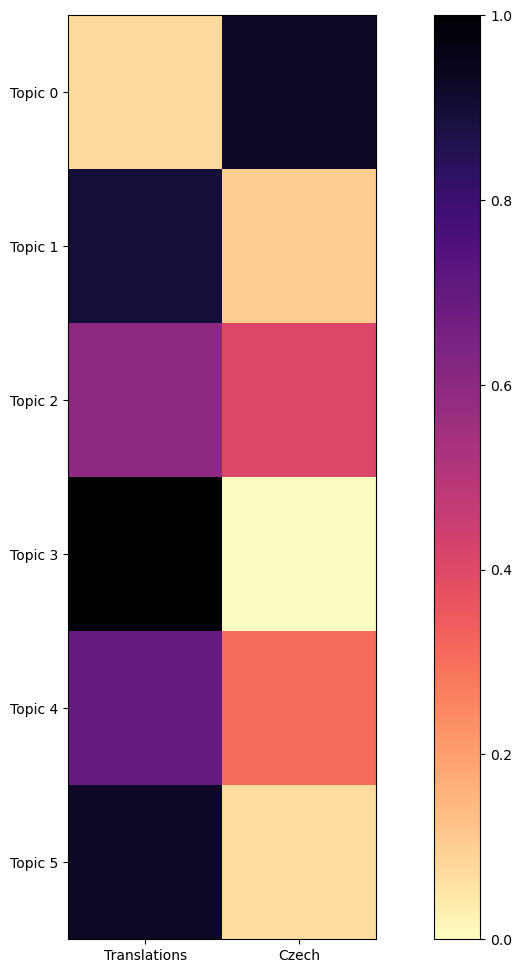

In [11]:
plt.figure(figsize=(15, 12))

fig = plt.imshow(heat_mat_4, cmap='magma_r', interpolation='nearest')
plt.xticks(range(2), ['Translations', 'Czech'])
num_topics = len(df.topic.unique())
y_ticks = ['Topic ' + str(n) for n in range(num_topics)]
plt.yticks(range(num_topics), y_ticks)
plt.colorbar(fig)

plt.show()

In [175]:
txtypes = np.unique(df.txtype.unique())
topics = np.unique(df.topic.unique()) 
heat_mat_5 = np.zeros(shape=(len(topics), len(txtypes)))
for i, topic in enumerate(topics):
    for j, txtype in enumerate(txtypes):
        print(str(topic) + ' ' + str(txtype) )
        print(len(df[(df.topic == topic) & (df.txtype == txtype)].index)   )
        heat_mat_5[i][j] = len(df[(df.topic == topic) & (df.txtype == txtype)]) /  len(df[(df.topic == topic)])   

0 COL: kratší próza
33
0 MEM: memoáry, autobiografie
9
0 NOV: próza
169
0 VER: poezie
0
1 COL: kratší próza
58
1 MEM: memoáry, autobiografie
18
1 NOV: próza
107
1 VER: poezie
1
2 COL: kratší próza
15
2 MEM: memoáry, autobiografie
64
2 NOV: próza
22
2 VER: poezie
0
3 COL: kratší próza
33
3 MEM: memoáry, autobiografie
10
3 NOV: próza
56
3 VER: poezie
0
4 COL: kratší próza
15
4 MEM: memoáry, autobiografie
3
4 NOV: próza
53
4 VER: poezie
0
5 COL: kratší próza
19
5 MEM: memoáry, autobiografie
8
5 NOV: próza
24
5 VER: poezie
0


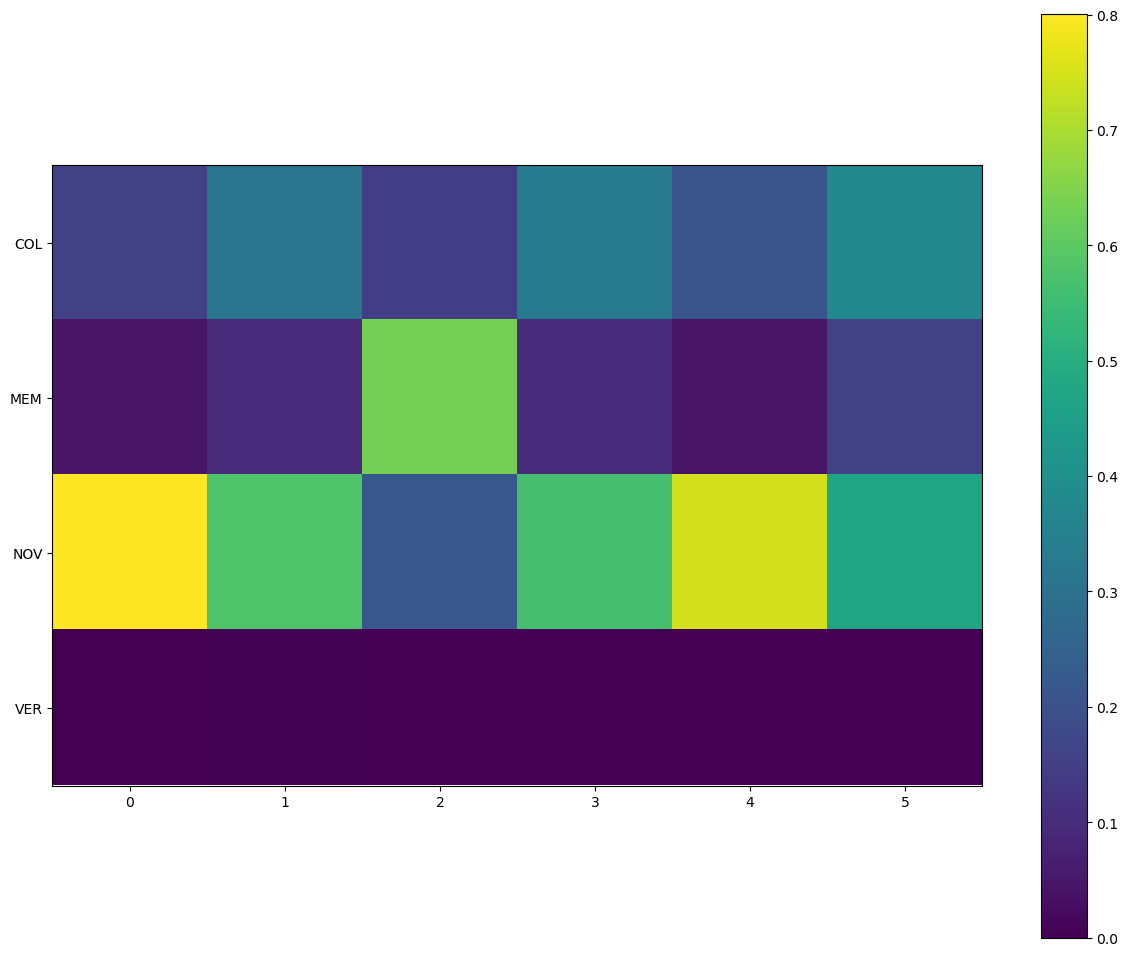

In [176]:
plt.figure(figsize=(15, 12))

fig = plt.imshow(heat_mat_5.T, cmap='viridis', interpolation='nearest')
num_topics = len(df.topic.unique())
x_ticks = [str(n) for n in range(num_topics)]
plt.xticks(range(num_topics), x_ticks)
num_txtypes = len(df.txtype.unique())
y_ticks = [n[:3] for n in txtypes]
plt.yticks(range(num_txtypes), y_ticks)
plt.colorbar(fig)

plt.show()

### TOP2VEC VISUALIZATION

In [5]:
import re 

## Load the model
top2vec_model = Top2Vec.load(model_path)

# Define the pattern
pattern = r'umap_n_n(\d+)'

# Search for the pattern in the string
#n_neighbors = re.search(pattern, model_path).group(1)

n_neighbors = 15
umap_args_model = {
"n_neighbors": int(n_neighbors),
"n_components": 2,
"metric": "cosine",
'random_state': 42
}

In [57]:
print(top2vec_model.doc_top)

ret = top2vec_model.hierarchical_topic_reduction(num_topics=2)
reduced = True

# Get topic nums and sizes
topic_sizes, topic_nums = top2vec_model.get_topic_sizes(reduced= reduced)

# Create document_topic list
doc_top_reduced = [0] * (len(df))

# Iter over topics
for topic_num in topic_nums: 

    # Get documents that are part of the topic
    documents, document_scores, document_ids = top2vec_model.search_documents_by_topic(topic_num=topic_num, num_docs=topic_sizes[topic_num], reduced = reduced)

    # Iter over documents
    for document_id, document_score in zip(document_ids, document_scores):

        # add txtype of the document into doc_top_reduced list
        #doc_top_reduced[document_id] = df[df['Unnamed: 0'] == document_id]['txtype'].values[0]
        doc_top_reduced[document_id] = topic_num
doc_top_reduced = np.array(doc_top_reduced) 
print(doc_top_reduced)   


[1 1 0 2 5 0 1 0 0 1 0 2 0 0 3 0 1 1 2 5 1 1 1 1 1 1 1 1 1 0 0 0 0 0 5 2 3
 2 4 1 0 0 0 5 0 0 1 3 1 0 1 1 0 0 0 1 2 0 1 2 1 1 2 4 2 4 5 0 3 0 1 1 2 1
 1 1 0 1 1 2 0 3 1 2 1 4 3 3 1 1 2 4 5 1 2 2 2 0 1 4 2 1 2 4 1 3 1 1 1 2 1
 0 3 1 0 4 5 5 2 0 1 2 0 2 3 4 1 2 1 3 1 0 2 3 5 3 5 3 5 0 2 2 5 1 4 4 4 4
 2 0 0 5 0 5 2 1 2 1 1 1 3 2 1 0 2 0 0 3 1 1 1 1 2 3 0 3 0 5 0 4 1 3 1 1 5
 0 0 0 0 0 0 1 0 0 1 0 3 0 2 1 5 3 1 4 5 2 0 2 1 1 3 0 1 1 2 0 0 2 4 1 4 0
 1 1 0 0 2 3 4 1 4 1 4 0 1 1 1 0 1 2 0 5 4 0 2 1 3 0 1 2 4 1 0 0 0 1 1 1 0
 1 2 5 3 1 0 3 3 4 5 5 5 3 1 5 1 2 1 5 1 1 1 1 2 1 1 1 1 3 0 1 0 1 2 4 1 0
 1 1 4 1 1 1 1 5 1 1 2 1 1 2 3 4 1 2 0 1 1 1 0 0 4 0 4 1 0 5 2 0 3 5 4 4 2
 0 4 1 3 1 3 4 1 1 1 4 2 2 4 1 2 5 3 0 0 1 5 1 5 1 3 2 0 1 4 2 4 1 4 0 5 0
 4 4 2 2 0 3 4 0 2 1 0 2 1 2 2 0 1 2 0 1 4 3 5 2 2 1 1 1 1 1 0 5 3 4 3 1 2
 1 1 4 4 1 4 3 0 1 2 2 2 1 2 1 4 3 3 3 1 2 4 1 4 3 2 5 1 0 0 1 1 1 2 3 0 1
 0 0 0 0 0 0 0 0 0 4 1 0 0 5 3 2 0 1 0 5 3 0 0 5 2 5 3 1 2 0 3 2 2 3 2 0 2
 1 0 3 2 2 2 2 2 2 3 2 1 

In [6]:
print(top2vec_model.doc_top)

#ret = top2vec_model.hierarchical_topic_reduction(num_topics=2)
topic_sizes, topic_nums = top2vec_model.get_topic_sizes()
doc_top_reduced = [0] * (len(df))
for topic_num in topic_nums: 
    documents, document_scores, document_ids = top2vec_model.search_documents_by_topic(topic_num=topic_num, num_docs=topic_sizes[topic_num])
    for document_id, document_score in zip(document_ids, document_scores):
        language = 'Czech' if df[df['Unnamed: 0'] == document_id]['srclang'].values[0] == 'cs: čeština' else 'Trans'
        txtype = df[df['Unnamed: 0'] == document_id]['txtype'].values[0][:3] if df[df['Unnamed: 0'] == document_id]['txtype'].values[0][0] != 'X' else 'X' 
        #doc_top_reduced[document_id] = language + '  ' +  txtype
        if txtype in ['NOV', 'COL', 'VER']:
            ttype = 'fiction'
        else:
            ttype = 'non-fiction'    
        doc_top_reduced[document_id] = language 
doc_top_reduced = np.array(doc_top_reduced) 
print(doc_top_reduced)

[1 0 2 3 0 3 0 3 3 0 3 1 3 3 1 3 0 0 1 0 2 0 0 0 0 0 0 0 0 3 2 2 2 3 0 2 1
 1 0 0 3 2 3 0 3 2 0 1 0 3 0 0 1 2 3 0 1 3 0 1 0 3 1 0 1 1 0 3 1 2 0 0 1 0
 0 0 2 0 0 1 3 1 0 1 0 2 1 1 0 0 1 2 0 0 3 1 1 2 0 2 0 0 0 0 0 0 0 0 0 1 0
 1 1 0 2 2 0 2 1 3 0 1 2 1 3 2 0 1 0 1 0 3 2 0 0 1 0 0 0 2 3 1 2 0 2 2 0 2
 1 3 3 0 3 0 1 0 3 0 0 0 1 1 0 3 0 2 3 1 0 0 0 0 1 1 2 1 2 2 2 2 0 1 0 0 0
 2 2 3 3 3 3 2 2 3 0 2 1 2 1 0 0 1 0 2 0 1 3 1 0 0 1 3 0 0 1 3 3 0 2 0 2 3
 0 0 3 2 2 1 0 0 0 0 1 3 0 0 0 2 0 1 3 0 2 2 1 0 1 3 0 0 2 0 2 2 3 0 0 0 3
 0 1 0 1 0 2 1 1 2 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 2 0 2 0 1 0 0 2
 0 0 2 1 0 0 0 2 0 0 0 0 0 1 1 0 0 1 2 0 0 0 2 3 2 3 2 0 2 2 3 0 0 0 0 2 1
 2 0 0 1 0 1 2 0 0 0 2 2 1 2 0 0 0 2 3 2 0 0 0 0 0 1 1 2 2 2 1 2 0 0 3 0 0
 2 2 1 0 3 1 2 2 1 0 3 1 0 1 1 2 0 0 2 0 1 1 0 0 1 0 0 0 0 2 3 0 1 2 1 0 1
 0 0 2 0 2 2 0 2 0 0 1 1 0 1 0 2 0 1 1 0 1 2 0 2 3 1 0 0 3 3 0 0 0 1 1 2 0
 2 3 2 2 2 3 3 3 3 0 0 3 3 0 1 0 2 0 3 0 1 2 2 0 1 2 1 2 1 3 1 1 1 0 1 3 1
 0 2 1 1 1 1 3 1 1 1 3 0 

In [289]:
num_topics = top2vec_model.get_num_topics()
print(num_topics)

6


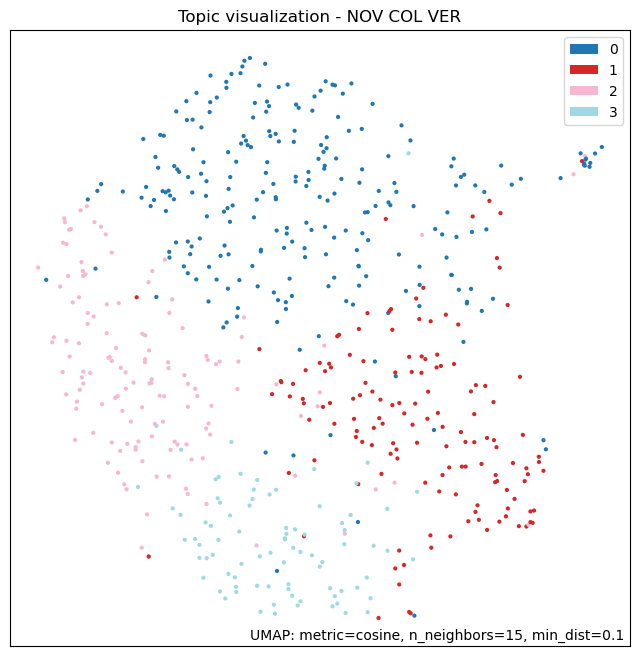

In [8]:
import umap.plot

umap_model = umap.UMAP(**umap_args_model).fit(top2vec_model.document_vectors)

umap.plot.points(umap_model, color_key_cmap='tab20', labels= top2vec_model.doc_top) #

plt.title('Topic visualization - NOV COL VER')

plt.show()

/Users/charlottepanuskova/anaconda3/lib/python3.11/site-packages/dask/dataframe/_pyarrow_compat.py:17: FutureWarning: Minimal version of pyarrow will soon be increased to 14.0.1. You are using 11.0.0. Please consider upgrading.
  warnings.warn(
/Users/charlottepanuskova/anaconda3/lib/python3.11/site-packages/umap/plot.py:203: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()


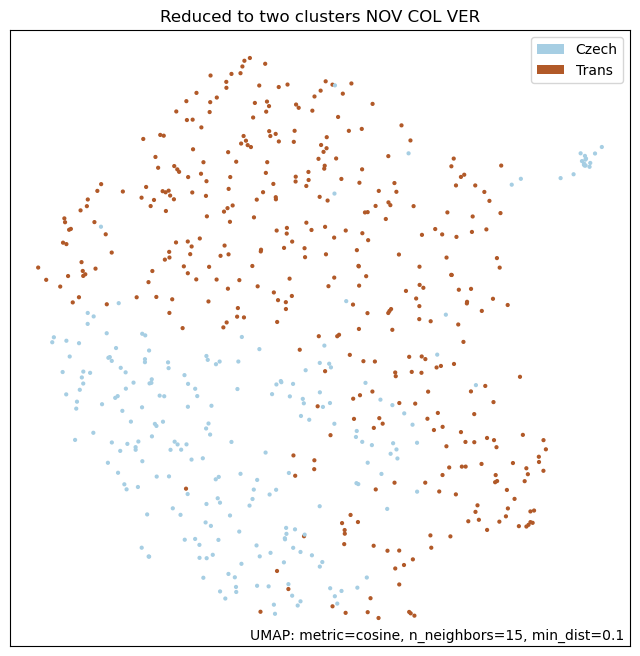

In [7]:
#num_topics = 10
import umap.plot

umap_model = umap.UMAP(**umap_args_model).fit(top2vec_model.document_vectors)

umap.plot.points(umap_model, color_key_cmap='Paired', labels= doc_top_reduced) #'tab20'

plt.title('Reduced to two clusters NOV COL VER')

plt.show()

/var/folders/sq/pxhs33t53bz1x33q9fhn04w00000gn/T/ipykernel_66449/1185153489.py:25: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



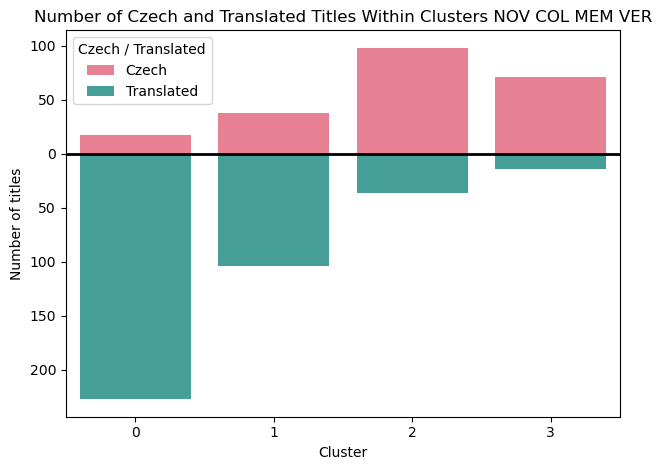

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

czech_trans = []
cluster = []
value = []
for top_num in np.unique(df.topic): 
    czech_trans.append('Czech')
    value.append(len(df[(df['srclang'] == 'cs: čeština') & (df['topic'] == top_num)].index))
    cluster.append(top_num)
    czech_trans.append('Translated')
    value.append(len(df[(df['srclang']  != 'cs: čeština') & (df['topic'] == top_num)].index))
    cluster.append(top_num)

data = pd.DataFrame({'Czech / Translated': czech_trans,
                     'Value': value,
                     'Cluster': cluster})
data['Value'] = np.where(data['Czech / Translated'] == 'Czech', data['Value'], -data['Value'])
ax = sns.barplot(data=data, x='Cluster', y='Value', hue='Czech / Translated', dodge=False, palette='husl')
ax.axhline(0, lw=2, color='black')
ax.set_ylabel('Number of titles')
ax.set_title('Number of Czech and Translated Titles Within Clusters NOV COL MEM VER')
ax.set_yticklabels(['250', '200', '150', '100', '50', '0', '50', '100', '150'])
#ax.set_yticklabels([250, 200, 100,  0,  100,  200, 250])
#sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()

In [8]:
import plotly.graph_objects as go
import plotly.graph_objects as go
import urllib, json



In [39]:
url = 'https://raw.githubusercontent.com/plotly/plotly.js/master/test/image/mocks/sankey_energy.json'
response = urllib.request.urlopen(url)
data = json.loads(response.read())

# override gray link colors with 'source' colors
opacity = 0.4
# change 'magenta' to its 'rgba' value to add opacity
data['data'][0]['node']['color'] = ['rgba(255,0,255, 0.8)' if color == "magenta" else color for color in data['data'][0]['node']['color']]
data['data'][0]['link']['color'] = [data['data'][0]['node']['color'][src].replace("0.8", str(opacity))
                                    for src in data['data'][0]['link']['source']]

fig = go.Figure(data=[go.Sankey(
    valueformat = ".0f",
    valuesuffix = "TWh",
    # Define nodes
    node = dict(
      pad = 15,
      thickness = 15,
      line = dict(color = "black", width = 0.5),
      label =  data['data'][0]['node']['label'],
      color =  data['data'][0]['node']['color']
    ),
    # Add links
    link = dict(
      source =  data['data'][0]['link']['source'],
      target =  data['data'][0]['link']['target'],
      value =  data['data'][0]['link']['value'],
      label =  data['data'][0]['link']['label'],
      color =  data['data'][0]['link']['color']
))])

fig.update_layout(title_text="Energy forecast for 2050<br>Source: Department of Energy & Climate Change, Tom Counsell via <a href='https://bost.ocks.org/mike/sankey/'>Mike Bostock</a>",
                  font_size=10)
fig.show()


In [31]:
file_all = 'top2vec_umap_n_n15_hdbscan_m_c_s15_doc2vec_new_NOV_COL_MEM_VER' #'top2vec_umap_n_n15_hdbscan_m_c_s15_doc2vec_new' #_NOV_COL_MEM_VER
df_path_all = 'data/results/top2vec/whole books  NOV COL MEM VER/{file}.xlsx'.format(file = file_all) #  NOV COL MEM VER
df_all = pd.read_excel(df_path_all)

file_nov_col_mem_ver = 'without_cs_top2vec_umap_n_n15_hdbscan_m_c_s15_doc2vec_new_NOV_COL_MEM_VER'#'top2vec_umap_n_n15_hdbscan_m_c_s15_doc2vec_new_NOV_COL_VER' 
df_path_nov_col_mem_ver = 'data/results/top2vec/whole books  NOV COL MEM VER/{file}.xlsx'.format(file = file_nov_col_mem_ver) #
df_nov_col_mem_ver = pd.read_excel(df_path_nov_col_mem_ver)

df_all['topic_fiction'] = df_all.apply(lambda row: df_nov_col_mem_ver[(df_nov_col_mem_ver['title'] == row['title'])&(df_nov_col_mem_ver['author'] == row['author'])]['topic'].values[0] + 100 if row['txtype'][:3] in ['NOV', 'COL','MEM',  'VER'] else 'vyřazeno' , axis=1 )

In [5]:
df_all.head()

,Unnamed: 0,title,author,publisher,first_published,authsex,translator,srclang,txtype,audience,topic,score,topic_fiction
0,0,Planeta lykantů,"Garen, Jean-Pierre",Najáda,1992,M: muž,"Procházková, Eva",fr: francouzština,NOV: próza,"GEN: obecné publikum"">",1,0.293261,101
1,1,Fiesta,"Hemingway, Ernest",Svoboda,1966,M: muž,"Vrba, František",en: angličtina,NOV: próza,"GEN: obecné publikum"">",1,0.275249,100
2,2,Příběh inženýra lidských duší,"Škvorecký, Josef",Atlantis,1977,M: muž,X,cs: čeština,NOV: próza,"GEN: obecné publikum"">",0,0.257948,100
3,3,Píseň o lítosti,"Fischl, Viktor",Atlantis,1982,M: muž,X,cs: čeština,NOV: próza,"GEN: obecné publikum"">",2,0.341688,101
4,596,Povolání: žena,"Bombecková, Erma",Ikar,1994,F: žena,"Hauserová, Eva - Stohrová, Lydie",en: angličtina,COL: kratší próza,"GEN: obecné publikum"">",5,0.564542,100


In [32]:
df_link = pd.DataFrame()

df_all['trans'] = df_all['srclang'].apply(lambda x: 'Czech' if x == 'cs: čeština' else 'Trans')
df_all['txtype_trans']= df_all[['txtype', 'trans']].apply(lambda x: str(x['txtype']) + ' ' + x['trans'] if x['txtype']  != 'X' else 'X' + ' ' + x['trans'] , axis = 1) #document_id]['txtype'].values[0][:3] if df[df['Unnamed: 0'] == document_id]['txtype'].values[0][0] != 'X' else 'X' 
df_link['source']  = df_all[['topic','topic_fiction']].apply(lambda x: x).drop_duplicates()['topic'].to_list()
df_link['target'] = df_all[['topic','topic_fiction']].apply(lambda x: x).drop_duplicates()['topic_fiction'].to_list()
df_link['value'] = df_link.apply(lambda row: len(df_all[(df_all['topic'] == row['source'])&(df_all['topic_fiction'] == row['target'])]), axis = 1).to_list()


#df_link = df_link.to_dict()

In [170]:
np.unique(df_link['value'])
df_all['txtype'] == df_all['txtype']
df_all['txtype_trans']

0                       NOV: próza Trans
1                       NOV: próza Trans
2                       NOV: próza Czech
3                       NOV: próza Czech
4                       NOV: próza Trans
                      ...               
1485    NEW: tradiční publicistika Czech
1486    NEW: tradiční publicistika Czech
1487    NEW: tradiční publicistika Czech
1488    NEW: tradiční publicistika Czech
1489    NEW: tradiční publicistika Czech
Name: txtype_trans, Length: 1490, dtype: object

In [33]:
fig = go.Figure(data=[go.Sankey(

    # Define nodes
    node = dict(
      thickness = 15,
      line = dict(color = "black", width = 0.5),
      
    ),
    # Add links
    link = dict(
      source =  df_link['source'],
      target =  df_link['target'],
      value =  df_link['value'],
))])


fig.show()


In [34]:
for source, target, value in zip(df_link['source'], df_link['target'], df_link['value'] ): #zip(data['data'][0]['link']['source'], data['data'][0]['link']['target'], data['data'][0]['link']['value'] ):
    #print((source, target), ': ', value)
    print(str(source) +  ' [' + str(value)+'] ' + str(target))



#data['data'][0]['link']['label']

1 [163] 100
0 [231] 101
2 [107] 102
5 [46] 100
3 [59] 103
2 [7] 100
4 [21] 100
3 [6] 100
2 [9] 103
1 [9] 101
4 [27] 102
0 [1] 103
5 [3] 102
1 [1] 103
0 [2] 102
4 [10] 101
0 [2] 100
5 [5] 101
3 [1] 102
2 [5] 101
5 [1] 103
4 [1] 103


In [183]:
data['data'][0]['link']['color']

['rgba(31, 119, 180, 0.4)',
 'rgba(255, 127, 14, 0.4)',
 'rgba(255, 127, 14, 0.4)',
 'rgba(255, 127, 14, 0.4)',
 'rgba(255, 127, 14, 0.4)',
 'rgba(227, 119, 194, 0.4)',
 'rgba(127, 127, 127, 0.4)',
 'rgba(188, 189, 34, 0.4)',
 'rgba(31, 119, 180, 0.4)',
 'rgba(23, 190, 207, 0.4)',
 'rgba(255, 127, 14, 0.4)',
 'rgba(255, 127, 14, 0.4)',
 'rgba(255, 127, 14, 0.4)',
 'rgba(140, 86, 75, 0.4)',
 'rgba(140, 86, 75, 0.4)',
 'rgba(140, 86, 75, 0.4)',
 'rgba(140, 86, 75, 0.4)',
 'rgba(140, 86, 75, 0.4)',
 'rgba(140, 86, 75, 0.4)',
 'rgba(140, 86, 75, 0.4)',
 'rgba(140, 86, 75, 0.4)',
 'rgba(140, 86, 75, 0.4)',
 'rgba(140, 86, 75, 0.4)',
 'rgba(140, 86, 75, 0.4)',
 'rgba(214, 39, 40, 0.4)',
 'rgba(140, 86, 75, 0.4)',
 'rgba(140, 86, 75, 0.4)',
 'rgba(140, 86, 75, 0.4)',
 'rgba(140, 86, 75, 0.4)',
 'rgba(140, 86, 75, 0.4)',
 'rgba(140, 86, 75, 0.4)',
 'rgba(127, 127, 127, 0.4)',
 'rgba(127, 127, 127, 0.4)',
 'rgba(127, 127, 127, 0.4)',
 'rgba(188, 189, 34, 0.4)',
 'rgba(23, 190, 207, 0.4)',
 'rgb